In [1]:
#This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. 
#Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
#The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

#objective: creating a solution that help the company to make an informed decision

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('Ecommerce Customers')

## Understanding the Data and how its shaped

In [4]:
df.shape #check how many rows and columns the dataset have

(500, 8)

In [5]:
df.head(5) #we take a look on what are the columns and what is the content inside each column in the top 5

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info() #checking the columns' dataTypes and if its need to be converted or hot-encoded for the ML model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe() #taking a statstical look at the data for better understanding

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Preparing The Data

In [8]:
df.loc[df.duplicated(subset=['Email'])].head(5) #Checking for duplicates in the dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [9]:
df = df.drop(['Email', 'Address', 'Avatar',
        #'Avg. Session Length', 'Time on App',
       #'Time on Website', 'Length of Membership', 'Yearly Amount Spent'
        ],axis=1)
# this will drop Email, Address, Avatar which are irrelevent for our ML solution

In [10]:
df = df.rename(columns={'Avg. Session Length':'AVG Session Length'}) # matching the naming format for other columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AVG Session Length    500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [11]:
df.isna().sum() #checking if the data have null values

AVG Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Features Understanding

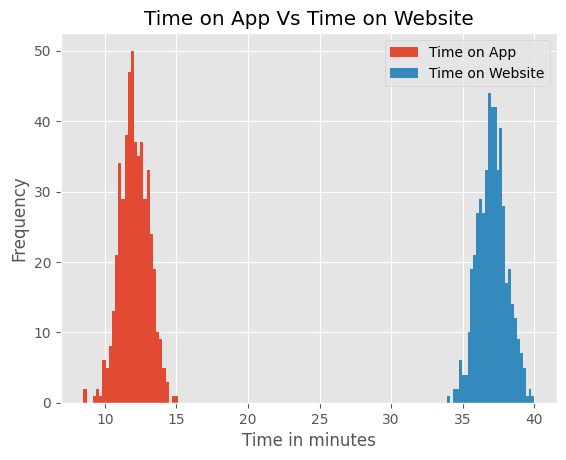

In [12]:
plt.hist(df[['Time on App']], label='Time on App', bins=30)
plt.hist(df[['Time on Website']], label='Time on Website', bins=30)
plt.title('Time on App Vs Time on Website')
plt.xlabel('Time in minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Understanding Features Relationship

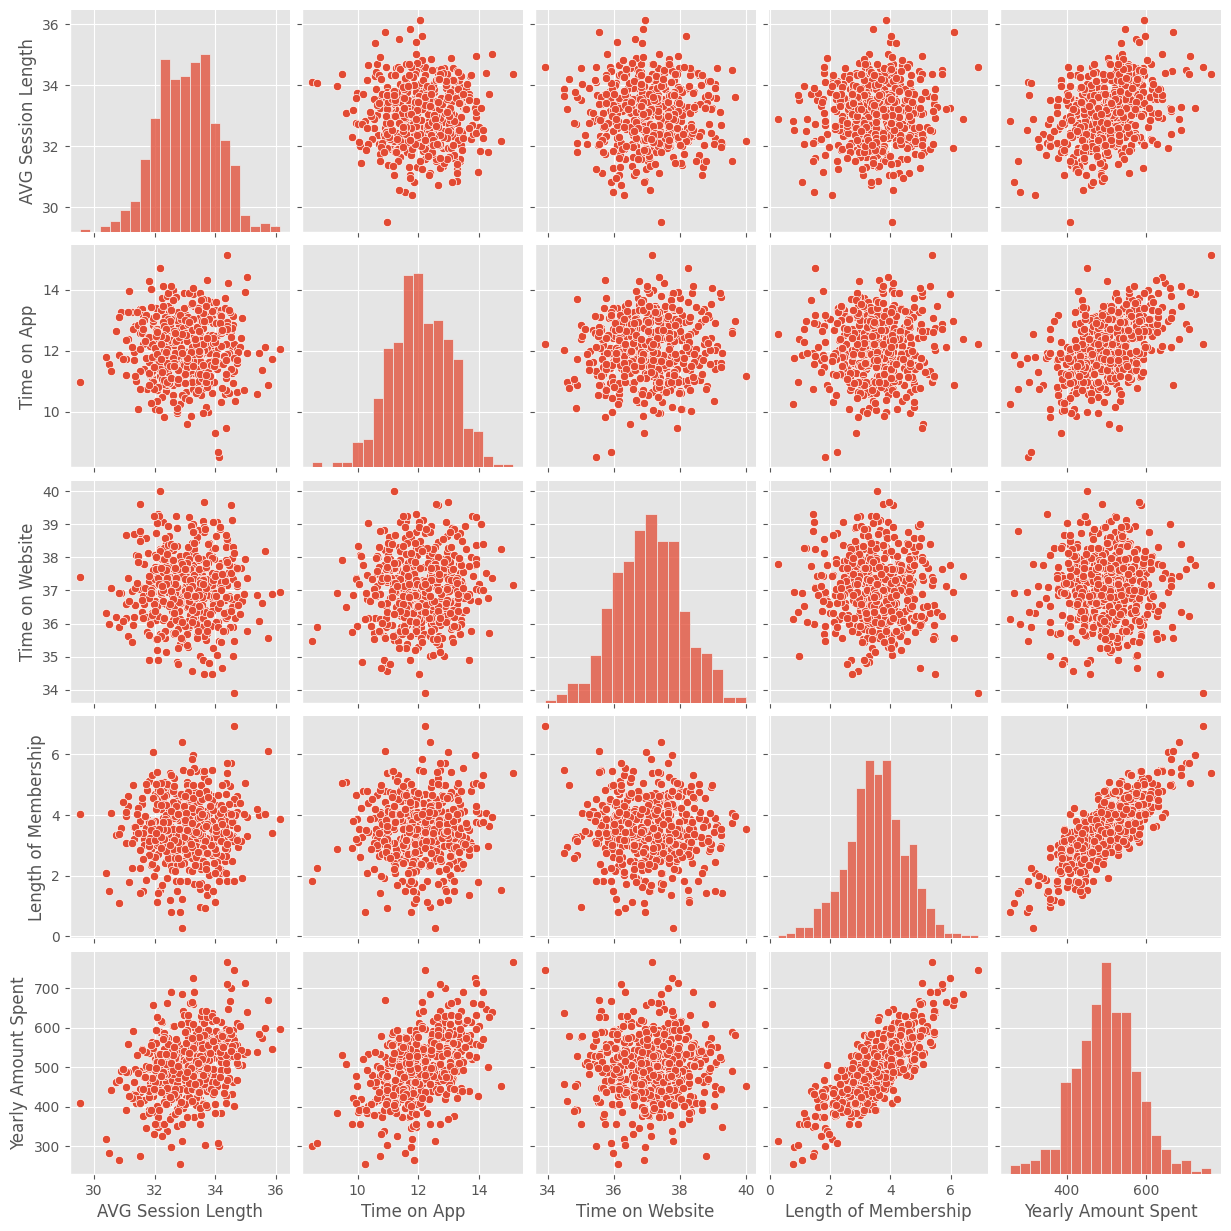

In [13]:
sns.pairplot(df, vars=df, )
plt.show()
# we mostly focus on Yearly Amount spent but also try to notice if there is a relationship between other features that might help in developing the solution
# we start to notice there is a moderate linear relationship between Time On App and Yearly Amount Spent
#there is a strong linear relationship between Lenght of membership and Yearly Amount Spent

In [14]:
df.corr()
# try to look for correlations 

# positive correlation means if X increased Y will increase
# Negative correlation means if X decreased Y will increase

# 0.3 to 0.5 indicate moderate correlation note: just because two variables have a moderate correlation doesnt mean one causes the other
# 0.5 to 1.0 to indicate strong correlation

,AVG Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
AVG Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

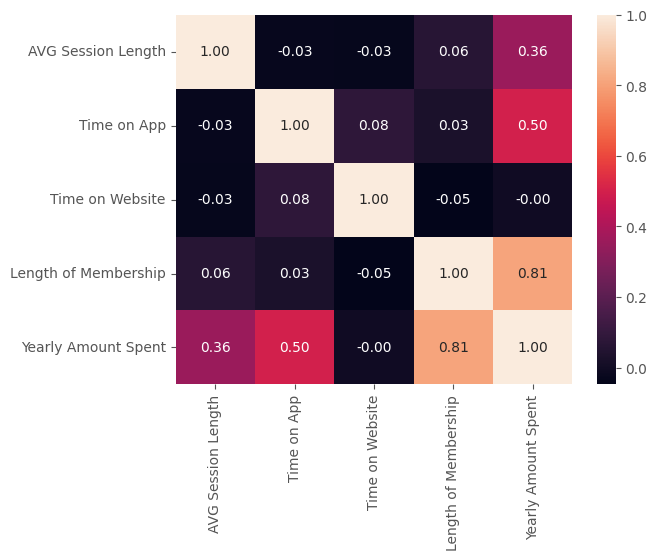

In [15]:
sns.heatmap(df.corr(), fmt='.2f',annot= True) #help better in spoting correlations

## ML Models: Preparing the Training and Testing data sets

In [16]:
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split

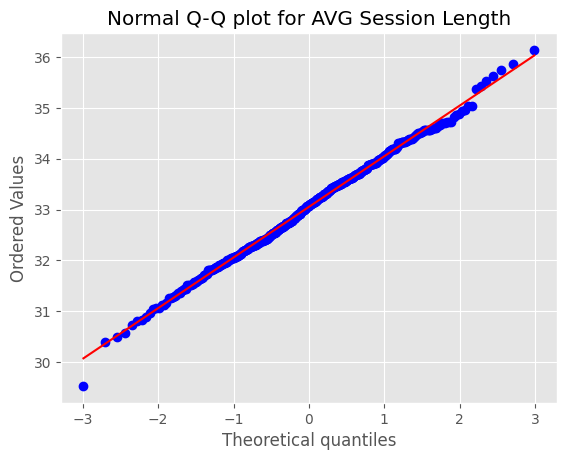

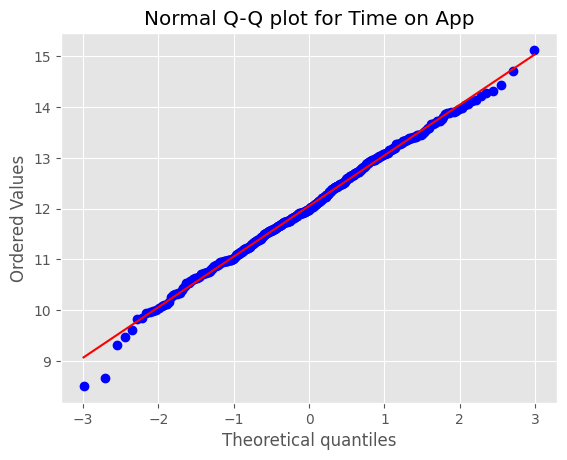

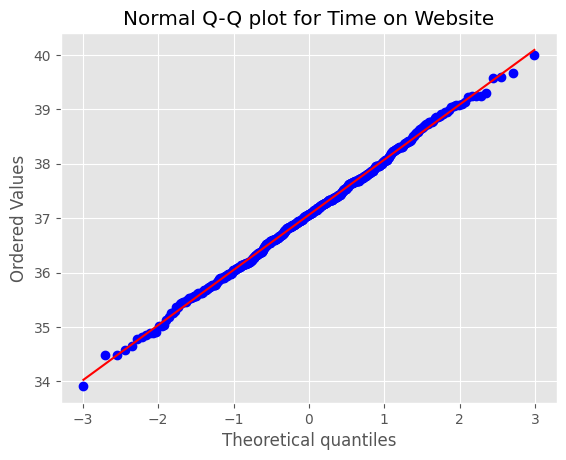

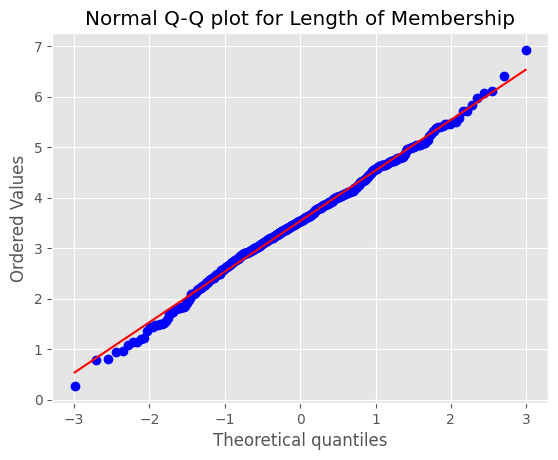

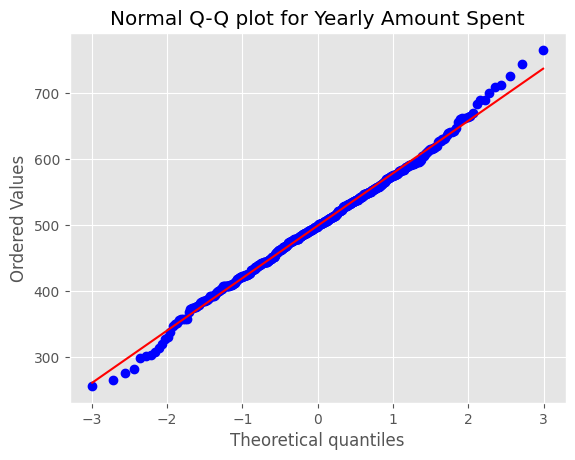

In [17]:
for col in df.columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Normal Q-Q plot for {col}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()
 # Since we confirmed that the data is normally distributed we can take some decisions like decision about the type of Scaler we going to use

In [18]:
# We Choose the StandardScaler
# Why? - because the data is normally distributed and models like Linear Regression are sensitive to feature scales + might cause issues to the performance when tunning
from sklearn.preprocessing import StandardScaler

# 1. Split the entire data into training and testing sets
X_full = df[['Length of Membership', 'Time on App', 'Time on Website']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.3, random_state=42
)

# 2. feature subsets
X_train_app = X_train[['Length of Membership', 'Time on App']]
X_test_app = X_test[['Length of Membership', 'Time on App']]

X_train_website = X_train[['Length of Membership', 'Time on Website']]
X_test_website = X_test[['Length of Membership', 'Time on Website']]

# 3. Apply StandardScaler to each feature subset
scaler_app = StandardScaler()
X_train_app_scaled = scaler_app.fit_transform(X_train_app)
X_test_app_scaled = scaler_app.transform(X_test_app)

scaler_website = StandardScaler()
X_train_website_scaled = scaler_website.fit_transform(X_train_website)
X_test_website_scaled = scaler_website.transform(X_test_website)

# fit is for learning: the scaler look at the data and learns its paramaters then store it internally
# transform: apply these paramters to the data
# only transform with no fit: it will use the paramaters that were learned and stored during the pervious fit aka on the training 

# Why do we use the standardScaler fit and transform only on the training data and only transform on the test data?
#  this is to prevent the data leakage where the model perform unrealistically good because it had prior knowledge of the test data characteristics
# so it wont really reflect on how the model perform on new, unseen data which will mess up model evaluation


## ML Models: Creation & Training

In [19]:
""" We will have 2 models for each type 
        First Model has independent features like Length of Membership and Time on Website,
        Second Model has independent features like Length of Membership and Time on App,
 both models will be prediciting the same Yearly Amount Spent """

# we will have 4 different ML models First and our Baseline is Scikit-learn Linear Regression
#   Second Model Elastic Net Regression Before and After Hyperparameter tuning
#   Third Model Support Vector Regression (SVR) Before and After Hyperparameter tuning
#   Fourth Model Extreme Gradient Boosting (XGBoost) Before and After Hyperparameter tuning

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
models_to_train = {

    'Linear Regression on App Data': {
        'model': LinearRegression(),
        'features': ['Length of Membership', 'Time on App'],
    },
    'Linear Regression on Website Data': {
        'model': LinearRegression(),
        'features': ['Length of Membership', 'Time on Website'],
    },

    'Elastic Net on App Data': {
        'model': ElasticNet(),
        'features': ['Length of Membership', 'Time on App'],
    },
    'Elastic Net on Website Data': {
        'model': ElasticNet(),
        'features': ['Length of Membership', 'Time on Website'],
    },

    'SVR on App Data': {
        'model': SVR(),
        'features': ['Length of Membership', 'Time on App'],
    },
    'SVR on Website Data': {
        'model': SVR(),
        'features': ['Length of Membership', 'Time on Website'],
    },

    'XGBoost on All Data': {
        'model': XGBRegressor(n_estimators=100), #n_estimators is the number of boosting trees
        'features': ['Length of Membership', 'Time on App', 'Time on Website'],
    }
}

trained_models = {}

In [21]:
for name, data in models_to_train.items():
    
    model = data['model']
    
    if 'App Data' in name:
        X_train_subset = X_train_app_scaled
    elif 'Website Data' in name:
        X_train_subset = X_train_website_scaled
    else:
        X_train_subset = X_train

    model.fit(X_train_subset, y_train)
    
    # Store the trained model
    trained_models[name] = {
        'model': model
    }
    print(f"{name} trained successfully\n")

Linear Regression on App Data trained successfully

Linear Regression on Website Data trained successfully

Elastic Net on App Data trained successfully

Elastic Net on Website Data trained successfully

SVR on App Data trained successfully

SVR on Website Data trained successfully

XGBoost on All Data trained successfully



In [22]:
trained_models

{'Linear Regression on App Data': {'model': LinearRegression()},
 'Linear Regression on Website Data': {'model': LinearRegression()},
 'Elastic Net on App Data': {'model': ElasticNet()},
 'Elastic Net on Website Data': {'model': ElasticNet()},
 'SVR on App Data': {'model': SVR()},
 'SVR on Website Data': {'model': SVR()},
 'XGBoost on All Data': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
           

## ML Models: Hyperparamters Tuning

In [23]:
# i will use Grid search since it search for the best possible combinations but at the expense of computing power, there are other search algo like randomized grid search
from sklearn.model_selection import GridSearchCV

In [24]:
tuned_models = {}

In [25]:
models_to_tune = {
    'Elastic Net on App Data': {
        'model': ElasticNet(max_iter=10000, tol=0.01), # Increase max_iterations for convergence
        'features': X_train_app_scaled, # Use the scaled training data for app
        'param_grid': {
            'alpha': [0.0001, 0.001, 0.01, 0.1], #regularization, Large alpha = more penalty, coefficients shrink, Small Alpha = weaker penalty
            'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99] # if L1 = 0 Pure Ridge, L1 = 1 Pure Lasso, for example 0.8 80% Lasso and 20% Ridge
        }
    },
    'Elastic Net on Website Data': {
        'model': ElasticNet(max_iter=10000, tol=0.01),
        'features': X_train_website_scaled,
        'param_grid': {
            'alpha': [0.0001, 0.001, 0.01, 0.1],
            'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99]
        }
    },

    'SVR on App Data': {
        'model': SVR(),
        'features': X_train_app_scaled,
        'param_grid': {
            'C': [0.1, 1, 10, 100, 1000, 10000], #regularization, 
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf', 'linear']
        }
    },
    'SVR on Website Data': {
        'model': SVR(),
        'features': X_train_website_scaled,
        'param_grid': {
            'C': [0.1, 1, 10, 100, 1000, 10000],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf', 'linear']
        }
    },
} 

In [26]:
for name, config in models_to_tune.items():

    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        cv=5,
        n_jobs=1, #if possible make it -1 so it can use all avaliable cpu cores to do compu in parrarel
        verbose=1
    )

    # Fitting the grid search using the training data
    grid_search.fit(config['features'], y_train)

    # store the best model and and parameters
    tuned_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    print(f"Finished Grid Search for: {name}")
    print(f"Best Parameters: {grid_search.best_params_}\n")

# IF the best hyperparamters are at the boundary of our range we expand that range cuz it might not be the optimal value

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Finished Grid Search for: Elastic Net on App Data
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.7}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Finished Grid Search for: Elastic Net on Website Data
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.5}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finished Grid Search for: SVR on App Data
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finished Grid Search for: SVR on Website Data
Best Parameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}



the SVR on website data having C of 1000 is worrying since it might lead to model that is sensitive to outliers and noise aka overfitting, we will know once we try it on the test data

In [27]:
param_grid = {      # DO NOT TRAIN ALL PARARMETERS AT ONCE IT WILL TAKE FORVER WITHOUT n_jobs = -1
    'n_estimators': [1000, 1500, 2000, 2500, 3000],
    'max_depth': [1],
    'learning_rate': [0.01],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
}
xgbr = XGBRegressor()

In [28]:
grid_search = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=1 #make it -1 if possible
)

grid_search.fit(X_train, y_train)

tuned_models['XGBoost on All Data'] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

print(f'\n {grid_search.best_estimator_}, {grid_search.best_params_}, {grid_search.best_score_}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...), {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.4}, 0.8750825784704179


In [29]:
tuned_models

{'Elastic Net on App Data': {'best_estimator': ElasticNet(alpha=0.01, l1_ratio=0.7, max_iter=10000, tol=0.01),
  'best_params': {'alpha': 0.01, 'l1_ratio': 0.7},
  'best_score': np.float64(0.8846504591678566)},
 'Elastic Net on Website Data': {'best_estimator': ElasticNet(alpha=0.01, max_iter=10000, tol=0.01),
  'best_params': {'alpha': 0.01, 'l1_ratio': 0.5},
  'best_score': np.float64(0.6547099958563984)},
 'SVR on App Data': {'best_estimator': SVR(C=10, kernel='linear'),
  'best_params': {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': np.float64(0.8841940114637786)},
 'SVR on Website Data': {'best_estimator': SVR(C=1000, kernel='linear'),
  'best_params': {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'},
  'best_score': np.float64(0.6532102265264687)},
 'XGBoost on All Data': {'best_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, 

## ML Models: Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
evaluation = {}
evaluation_tuned = {}

In [31]:
for name, data in trained_models.items():
    
    model = data['model']
    print(f'Calculating the Evalution for {name}')

    if 'App Data' in name:
        y_predict = model.predict(X_test_app_scaled)
    elif 'Website Data' in name:
        y_predict = model.predict(X_test_website_scaled)
    else:
        y_predict = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    R2_Score = r2_score(y_test, y_predict)

    evaluation[name] = {
        'MAE': MAE,
        'RMSE': RMSE,
        'R2_Score': R2_Score,
        'prediction': y_predict
    }

    print(f'Mean Absolute Error: {MAE},     \nRoot Mean Square Error: {RMSE},     \nR2_Score: {R2_Score} \n')

Calculating the Evalution for Linear Regression on App Data
Mean Absolute Error: 22.42987485928227,     
Root Mean Square Error: 27.442017948763848,     
R2_Score: 0.8614087935123627 

Calculating the Evalution for Linear Regression on Website Data
Mean Absolute Error: 35.8455358557929,     
Root Mean Square Error: 44.54540767407019,     
R2_Score: 0.6348179156049673 

Calculating the Evalution for Elastic Net on App Data
Mean Absolute Error: 28.001888948066618,     
Root Mean Square Error: 35.96391959855095,     
R2_Score: 0.7619667515251768 

Calculating the Evalution for Elastic Net on Website Data
Mean Absolute Error: 38.476951885578295,     
Root Mean Square Error: 48.85444383182298,     
R2_Score: 0.5607500360863006 

Calculating the Evalution for SVR on App Data
Mean Absolute Error: 38.815934869942446,     
Root Mean Square Error: 54.08373835845799,     
R2_Score: 0.4616843651764102 

Calculating the Evalution for SVR on Website Data
Mean Absolute Error: 47.34122332129479,     


In [32]:
for name, data in tuned_models.items():
    
    model = data['best_estimator']
    print(f'Calculating the Evaluation for {name}')

    if 'App Data' in name:
        y_predict = model.predict(X_test_app_scaled)
    elif 'Website Data' in name:
        y_predict = model.predict(X_test_website_scaled)
    else:
        y_predict = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    R2_Score = r2_score(y_test, y_predict)

    evaluation_tuned[name] = {
        'MAE': MAE,
        'RMSE': RMSE,
        'R2_Score': R2_Score,
        'prediction': y_predict
    }

    print(f'Mean Absolute Error: {MAE},     \nRoot Mean Square Error: {RMSE},     \nR2_Score: {R2_Score} \n')

Calculating the Evaluation for Elastic Net on App Data
Mean Absolute Error: 22.434073627324135,     
Root Mean Square Error: 27.447289258663496,     
R2_Score: 0.8613555447049223 

Calculating the Evaluation for Elastic Net on Website Data
Mean Absolute Error: 35.80796018981166,     
Root Mean Square Error: 44.54519019599595,     
R2_Score: 0.6348214813553661 

Calculating the Evaluation for SVR on App Data
Mean Absolute Error: 22.680163854278977,     
Root Mean Square Error: 27.769685786639453,     
R2_Score: 0.8580793737600652 

Calculating the Evaluation for SVR on Website Data
Mean Absolute Error: 35.83978418114521,     
Root Mean Square Error: 44.504566955102,     
R2_Score: 0.6354872309259163 

Calculating the Evaluation for XGBoost on All Data
Mean Absolute Error: 23.83484847125972,     
Root Mean Square Error: 28.917174284012752,     
R2_Score: 0.8461082662837606 



In [33]:
evaluation_tuned

{'Elastic Net on App Data': {'MAE': 22.434073627324135,
  'RMSE': np.float64(27.447289258663496),
  'R2_Score': 0.8613555447049223,
  'prediction': array([427.99689621, 549.17622666, 468.6113774 , 517.12825295,
         452.55627385, 585.52705421, 481.45579724, 507.38759452,
         424.10220511, 475.49022441, 470.06847206, 414.00631372,
         430.01190435, 487.59763919, 447.43321734, 410.34178502,
         571.50343382, 480.25102373, 444.50062451, 483.67032769,
         459.68543011, 480.63089505, 527.21496662, 631.20853271,
         437.2110762 , 504.85909176, 567.37563554, 529.37333335,
         429.25652904, 352.90577837, 514.41283954, 497.00243803,
         497.50654469, 317.80805007, 507.63353106, 473.13705518,
         545.18538259, 435.45900175, 468.99125959, 477.7244556 ,
         481.0964817 , 426.68689436, 501.03396949, 514.57304741,
         495.94986518, 534.40868842, 557.35594848, 493.04741433,
         318.2706435 , 470.67042648, 438.53352674, 494.96331204,
         

In [34]:
# Mean Absolute Error: average size of the errors, simplier version: on average, the model is off by X units from actual predictions
# Root Mean Square Error: penalizes large errors more than MAE
# R2 Score: measures how well a regression model fits the data, simplier version: closer to 1 is better
filters = ('App Data', 'XGBoost')
for name, data in evaluation.items():
    if any(k in name for k in filters):
        print(f"\n=== {name} ===")
        print(f"MAE     : {data['MAE']:.4f}")
        print(f"RMSE    : {data['RMSE']:.4f}")
        print(f"R2_Score: {data['R2_Score']:.4f}")
    
        if name in evaluation_tuned:
            tuned = evaluation_tuned[name]
            print(f"--- {name} (Tuned) ---")
            print(f"MAE     : {tuned['MAE']:.4f}")
            print(f"RMSE    : {tuned['RMSE']:.4f}")
            print(f"R2_Score: {tuned['R2_Score']:.4f}")



=== Linear Regression on App Data ===
MAE     : 22.4299
RMSE    : 27.4420
R2_Score: 0.8614

=== Elastic Net on App Data ===
MAE     : 28.0019
RMSE    : 35.9639
R2_Score: 0.7620
--- Elastic Net on App Data (Tuned) ---
MAE     : 22.4341
RMSE    : 27.4473
R2_Score: 0.8614

=== SVR on App Data ===
MAE     : 38.8159
RMSE    : 54.0837
R2_Score: 0.4617
--- SVR on App Data (Tuned) ---
MAE     : 22.6802
RMSE    : 27.7697
R2_Score: 0.8581

=== XGBoost on All Data ===
MAE     : 25.3286
RMSE    : 32.1452
R2_Score: 0.8098
--- XGBoost on All Data (Tuned) ---
MAE     : 23.8348
RMSE    : 28.9172
R2_Score: 0.8461


In [35]:
filters = ('Website Data', 'XGBoost')
for name, data in evaluation.items():
    if any(k in name for k in filters):
        print(f"\n=== {name} ===")
        print(f"MAE     : {data['MAE']:.4f}")
        print(f"RMSE    : {data['RMSE']:.4f}")
        print(f"R2_Score: {data['R2_Score']:.4f}")
    
        if name in evaluation_tuned:
            tuned = evaluation_tuned[name]
            print(f"--- {name} (Tuned) ---")
            print(f"MAE     : {tuned['MAE']:.4f}")
            print(f"RMSE    : {tuned['RMSE']:.4f}")
            print(f"R2_Score: {tuned['R2_Score']:.4f}")


=== Linear Regression on Website Data ===
MAE     : 35.8455
RMSE    : 44.5454
R2_Score: 0.6348

=== Elastic Net on Website Data ===
MAE     : 38.4770
RMSE    : 48.8544
R2_Score: 0.5608
--- Elastic Net on Website Data (Tuned) ---
MAE     : 35.8080
RMSE    : 44.5452
R2_Score: 0.6348

=== SVR on Website Data ===
MAE     : 47.3412
RMSE    : 62.0128
R2_Score: 0.2923
--- SVR on Website Data (Tuned) ---
MAE     : 35.8398
RMSE    : 44.5046
R2_Score: 0.6355

=== XGBoost on All Data ===
MAE     : 25.3286
RMSE    : 32.1452
R2_Score: 0.8098
--- XGBoost on All Data (Tuned) ---
MAE     : 23.8348
RMSE    : 28.9172
R2_Score: 0.8461


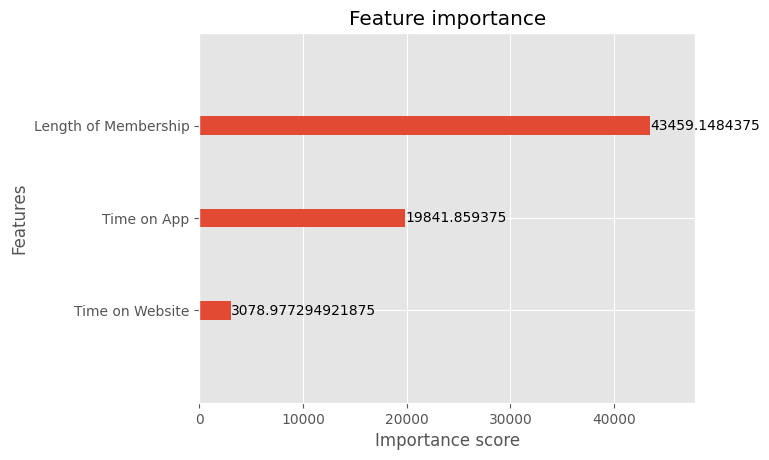

In [ ]:
from xgboost import plot_importance

model = tuned_models['XGBoost on All Data']['best_estimator']

plot_importance(model, importance_type='gain')
plt.show()

the model with lowest MAE on website data
--- Elastic Net on Website Data (Tuned) ---
MAE     : 35.8080
RMSE    : 44.5452
R2_Score: 0.6348

the model with the lowest MAE on app data
=== Linear Regression on App Data ===
MAE     : 22.4299
RMSE    : 27.4420
R2_Score: 0.8614

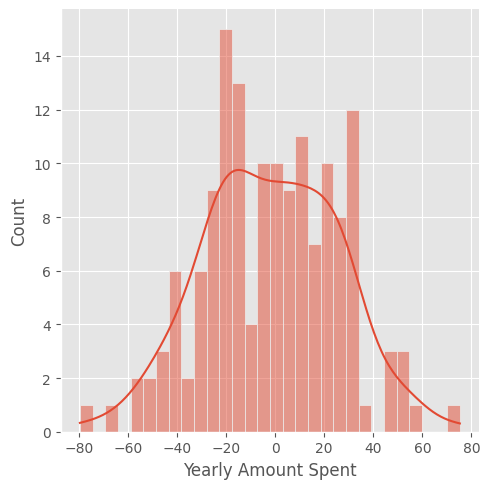

In [46]:
predictions = evaluation['Linear Regression on App Data']['prediction'] #Elastic Net on Website Data
residuals = y_test-predictions
sns.displot(residuals, bins=30, kde=True)
plt.show()

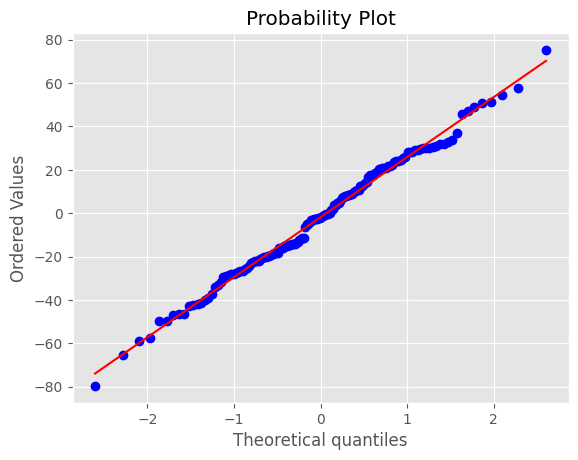

In [47]:
import pylab 
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

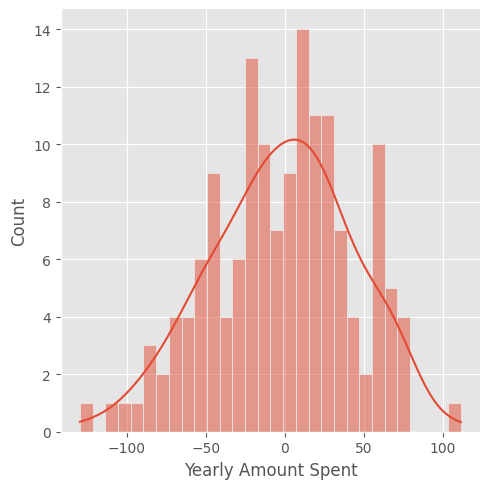

In [48]:
predictions = evaluation_tuned['Elastic Net on Website Data']['prediction']
residuals = y_test-predictions
sns.displot(residuals, bins=30, kde=True)
plt.show()

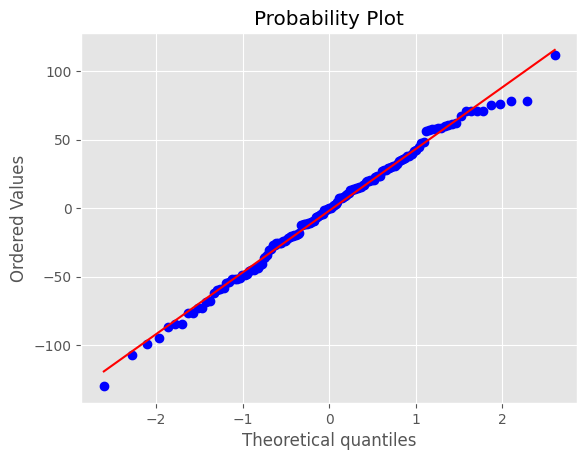

In [49]:
import pylab 
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion and Recommendations

we notice that there is a big difference in Feature Importance between Time on App and Time on Website, 
we also notice that there is a big difference between Time on App and Time on Website correlation to Yearly Amount Spent

Recommendation: Based on the analysis and models performance, Time on App has a significantly higher impact on Yearly Amount Spent compared to Time on Website,
based on that the company should focus its efforts to improve the mobile app experince